In [2]:
import xarray as xr, numpy as np, metpy.calc as mpcalc
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import json

In [3]:
wind=xr.open_dataset('./data/wind.grib', engine='cfgrib')
wind=wind.metpy.quantify()
wind = wind.rename({"isobaricInhPa": "pressure", "latitude": "lat", "longitude": "lon"})

In [4]:
QBO = 0
with open("QBO.json") as f:
    QBO = json.loads(f.read())
QBO.get("2000")
negative = {}
positive = {}
normal = {}
plot = {}
for year in QBO:
    negative[int(year)] = []
    positive[int(year)] = []
    normal[int(year)] = []
    for month in QBO[year]:
        plot[float(year) + (float(month)-1)/12] = QBO[year][month]
        if QBO[year][month] >= 10:
            positive[int(year)].append(int(month))
        if QBO[year][month] <= -20:
            negative[int(year)].append(int(month))
        if QBO[year][month] <= 5 and QBO[year][month] >= -5:
            normal[int(year)].append(int(month))

positive

{2000: [],
 2001: [],
 2002: [4, 5, 6, 7, 8],
 2003: [],
 2004: [4, 5, 6],
 2005: [],
 2006: [5, 6, 7, 9, 10, 11],
 2007: [],
 2008: [5, 6, 7, 8, 9, 10, 12],
 2009: [1, 2, 3],
 2010: [10, 11, 12],
 2011: [2, 3, 4, 5],
 2012: [],
 2013: [5, 6, 7, 8, 9, 10, 11, 12],
 2014: [1, 2, 3],
 2015: [8, 9, 10, 11, 12],
 2016: [8, 9, 10, 11, 12],
 2017: [1, 2, 3, 4],
 2018: [],
 2019: [3, 4, 5, 6, 7]}

In [39]:
DJFp = []
DJFn = []
DJFh = [] #QBO normal
JJAp = []
JJAn = []
JJAh = [] #QBO normal
for year in positive:
    if positive[year] == []:
            continue
    for i in positive[year]:
        if i in [1,11,12]:
            if i == 1:
                DJFp.append(f"{year}-0{i}")
            else:
                DJFp.append(f"{year}-{i}")
        if i in [6, 7, 8]:
            JJAp.append(f"{year}-0{i}")

    if negative[year] == []:
            continue
    for j in negative[year]:
        if j in [1,11,12]:
            if j == 1:
                DJFn.append(f"{year}-0{j}")
            else:
                DJFn.append(f"{year}-{j}")
        if j in [6, 7, 8]:
            JJAn.append(f"{year}-0{j}")

    if normal[year] == []:
            continue
    for h in normal[year]:
        if h in [1,11,12]:
            if h == 1:
                DJFh.append(f"{year}-0{h}")
            else:
                DJFh.append(f"{year}-{h}")
        if h in [6, 7, 8]:
            JJAh.append(f"{year}-0{h}")
DJFn

['2014-11', '2014-12', '2015-01']

In [24]:
umeanE.values

array([[-2.82287598e-04,  5.55673800e-02,  1.65322706e-01, ...,
        -1.16632812e-01, -1.01516441e-01, -2.82287598e-04],
       [ 9.85463485e-05,  8.56235251e-02,  2.16719851e-01, ...,
        -2.32818983e-02, -5.18777668e-02,  9.85463485e-05],
       [ 2.86102295e-06,  1.09187603e-01,  2.49888867e-01, ...,
         1.41265586e-01,  5.35593741e-02,  2.86102295e-06],
       ...,
       [-5.92231750e-04,  1.51307285e-01,  3.08414996e-01, ...,
         1.46905899e-01,  6.91498220e-02, -5.92231750e-04],
       [ 4.24067170e-04,  1.48870170e-01,  3.05504948e-01, ...,
         1.94398388e-01,  1.01092815e-01,  4.24067170e-04],
       [-1.29699707e-04,  2.12080434e-01,  4.06754345e-01, ...,
         2.38299564e-01,  1.18156150e-01, -1.29699707e-04]], dtype=float32)

Text(0.5, 0.98, 'Zonal wind mean for QBO easterly and westerly')

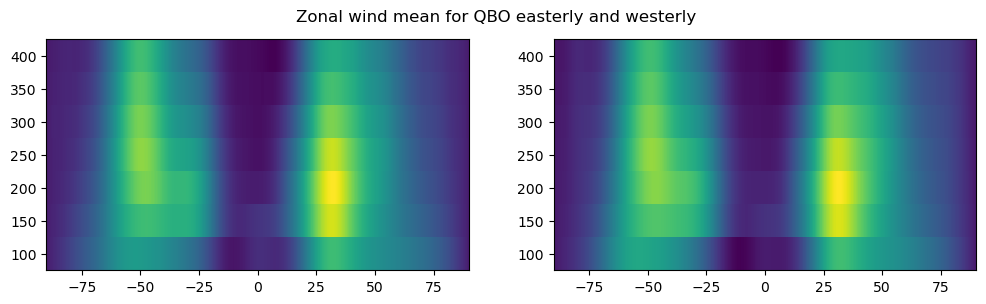

In [40]:
uwind = wind.u
easterly = []
westerly = []
for year in uwind.time.values:
    if str(year)[:7] in DJFn:
        easterly.append(uwind.sel(time = year))
    if str(year)[:7] in DJFp:
        westerly.append(uwind.sel(time = year))
uwindE = xr.concat(easterly, dim="time")
uwindW = xr.concat(westerly, dim="time")
umeanE = uwindE.mean(dim = ['time', 'lon'])
umeanW = uwindW.mean(dim = ['time', 'lon'])
fid, axes = plt.subplots(1,2, figsize = (12, 3))
axes[0].pcolormesh(umeanE.lat, umeanE.pressure, umeanE.values)
axes[1].pcolormesh(umeanW.lat, umeanW.pressure, umeanW.values)
plt.suptitle("Zonal wind mean for QBO easterly and westerly")

In [34]:
umeanE-umeanW

Magnitude,[[-0.00023915217025205493 0.003718119114637375 0.013118892908096313 ... 0.008710496127605438 -0.009711995720863342 -0.00023915217025205493] [0.0003512700495775789 0.03795545920729637 0.07518982887268066 ... 0.01148425042629242 -0.012651383876800537 0.0003512700495775789] [0.00012911282829008996 0.044686056673526764 0.07866284251213074 ... 0.12011066824197769 0.06022631376981735 0.00012911282829008996] ... [-0.0005903244018554688 0.015687957406044006 0.031566351652145386 ... 0.06211917847394943 0.038053903728723526 -0.0005903244018554688] [0.0007452353602275252 -0.013085782527923584 -0.01277238130569458 ... 0.06567516922950745 0.04232276603579521 0.0007452353602275252] [-0.0005126366158947349 0.02598758041858673 0.036751627922058105 ... 0.09207825362682343 0.05252743512392044 -0.0005126366158947349]]
Units,meter/second


In [41]:
JJAp

['2002-06',
 '2002-07',
 '2002-08',
 '2004-06',
 '2006-06',
 '2006-07',
 '2008-06',
 '2008-07',
 '2008-08',
 '2013-06',
 '2013-07',
 '2013-08',
 '2015-08',
 '2016-08',
 '2019-06',
 '2019-07']

Text(0.5, 0.98, 'Zonal wind mean for QBO easterly and westerly')

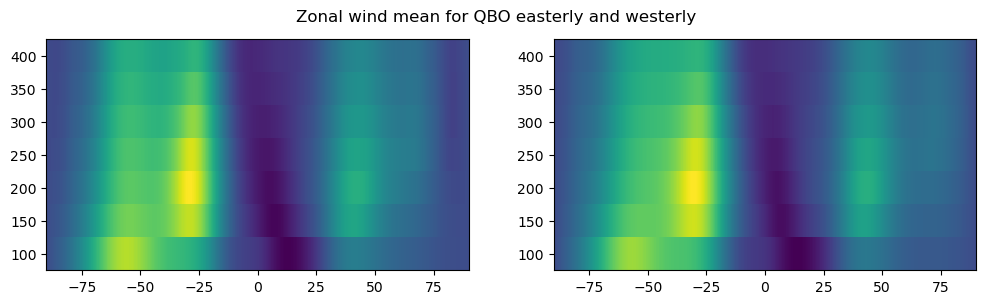

In [42]:
uwind = wind.u
easterly = []
westerly = []
for year in uwind.time.values:
    if str(year)[:7] in JJAn:
        easterly.append(uwind.sel(time = year))
    if str(year)[:7] in JJAp:
        westerly.append(uwind.sel(time = year))
uwindE = xr.concat(easterly, dim="time")
uwindW = xr.concat(westerly, dim="time")
umeanE = uwindE.mean(dim = ['time', 'lon'])
umeanW = uwindW.mean(dim = ['time', 'lon'])
fid, axes = plt.subplots(1,2, figsize = (12, 3))
axes[0].pcolormesh(umeanE.lat, umeanE.pressure, umeanE.values)
axes[1].pcolormesh(umeanW.lat, umeanW.pressure, umeanW.values)
plt.suptitle("Zonal wind mean for QBO easterly and westerly")

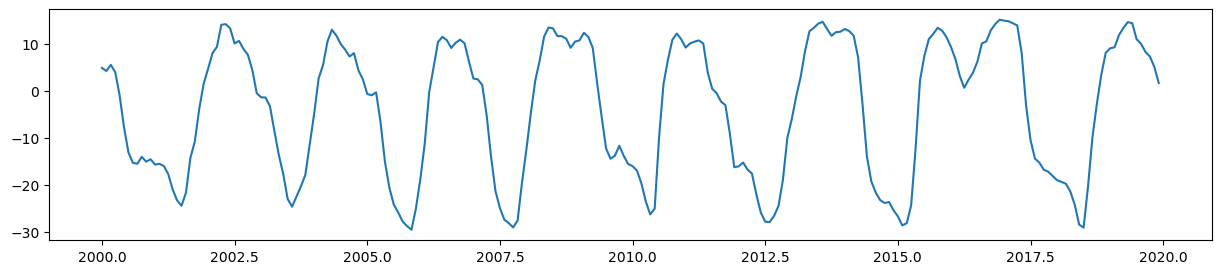

In [8]:
x = list(plot.keys())
y = list(plot.values())
fig, ax = plt.subplots(1,1, figsize=(15,3))
ax.plot(x, y)